<a href="https://colab.research.google.com/github/sanskriti111-j/Data-Analysis/blob/main/handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handing Missing Numerical Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df=pd.read_csv('/content/personality_dataset.csv')

In [9]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isnull().mean()

,0
Time_spent_Alone,0.021724
Stage_fear,0.025172
Social_event_attendance,0.021379
Going_outside,0.022759
Drained_after_socializing,0.017931
Friends_circle_size,0.026552
Post_frequency,0.022414
Personality,0.000000


In [6]:
x=df.drop(columns=['Personality'])
y=df['Personality']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
x_train.shape,x_test.shape

((2320, 7), (580, 7))

In [10]:
x_train.isnull().mean()

,0
Time_spent_Alone,0.021121
Stage_fear,0.028448
Social_event_attendance,0.020690
Going_outside,0.022845
Drained_after_socializing,0.017672
Friends_circle_size,0.027155
Post_frequency,0.021552


In [12]:
mean_Time_spent_Alone=x_train['Time_spent_Alone'].mean()
median_Time_spent_Alone=x_train['Time_spent_Alone'].median()

mean_Going_outside=x_train['Going_outside'].mean()
median_Going_outside=x_train['Going_outside'].median()



In [15]:
x_train['Time_spent_Alone_mean']=x_train['Time_spent_Alone'].fillna(mean_Time_spent_Alone)
x_train['Time_spent_Alone_median']=x_train['Time_spent_Alone'].fillna(median_Time_spent_Alone)
x_train['Going_outside_mean']=x_train['Going_outside'].fillna(mean_Going_outside)
x_train['Going_outside_median']=x_train['Going_outside'].fillna(median_Going_outside)

In [16]:
x_train.sample(6)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_spent_Alone_mean,Time_spent_Alone_median,Going_outside_mean,Going_outside_median
1808,3.0,No,8.0,5.0,No,11.0,6.0,3.000000,3.0,5.0,5.0
2645,2.0,NaN,8.0,6.0,No,11.0,3.0,2.000000,2.0,6.0,6.0
772,3.0,No,6.0,4.0,No,6.0,8.0,3.000000,3.0,4.0,4.0
1627,NaN,Yes,3.0,0.0,Yes,2.0,NaN,4.431088,3.0,0.0,0.0
2719,11.0,Yes,1.0,0.0,Yes,3.0,2.0,11.000000,11.0,0.0,0.0
678,6.0,Yes,2.0,1.0,Yes,1.0,1.0,6.000000,6.0,1.0,1.0


In [18]:
print('Time spent alone variance:',x_train['Time_spent_Alone'].var())
print('Time spent alone variance after mean imputation:',x_train['Time_spent_Alone_mean'].var())
print('Time spent alone variance after median imputation:',x_train['Time_spent_Alone_median'].var())

print('Going outside variance:',x_train['Going_outside'].var())
print('Going outside variance after mean imputation:',x_train['Going_outside_mean'].var())
print('Going outside variance after median imputation:',x_train['Going_outside_median'].var())

Time spent alone variance: 12.042715953111166
Time spent alone variance after mean imputation: 11.788255805762116
Time spent alone variance after median imputation: 11.830615901622167
Going outside variance: 5.003032885590066
Going outside variance after mean imputation: 4.888690176260065
Going outside variance after median imputation: 4.888691432097818


Here we can observe that after mean/median imputation variance decreases/shrinks. This is because our observation shifts more towards mean/median

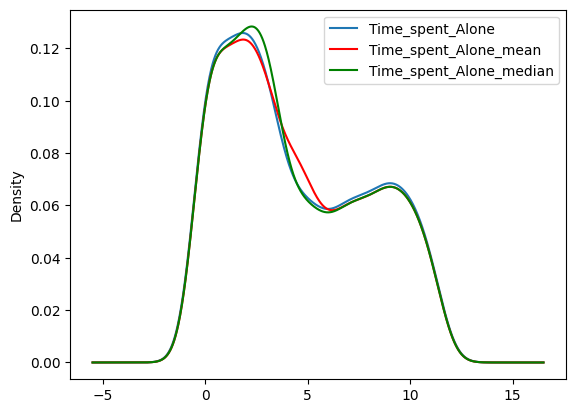

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Time_spent_Alone'].plot(kind='kde',ax=ax)
x_train['Time_spent_Alone_mean'].plot(kind='kde',ax=ax,color='red')
x_train['Time_spent_Alone_median'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

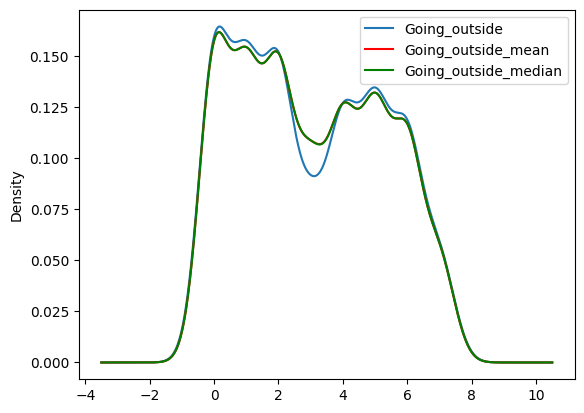

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Going_outside'].plot(kind='kde',ax=ax)
x_train['Going_outside_mean'].plot(kind='kde',ax=ax,color='red')
x_train['Going_outside_median'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [25]:
print(x_train.cov)

<bound method DataFrame.cov of       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
2815               2.0         No                      8.0            6.0   
1818               0.0         No                      5.0            3.0   
2332               0.0         No                      5.0            3.0   
2226              10.0        NaN                      3.0            0.0   
1902               NaN        Yes                      0.0            1.0   
...                ...        ...                      ...            ...   
2514               3.0         No                      7.0            6.0   
2347               2.0         No                      5.0            5.0   
1608              10.0        Yes                      2.0            2.0   
2541               NaN        Yes                      3.0            1.0   
2575               0.0         No                      7.0            4.0   

     Drained_after_socializing  Friends_circ

In [28]:
print(x_train.corr)

<bound method DataFrame.corr of       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
2815               2.0         No                      8.0            6.0   
1818               0.0         No                      5.0            3.0   
2332               0.0         No                      5.0            3.0   
2226              10.0        NaN                      3.0            0.0   
1902               NaN        Yes                      0.0            1.0   
...                ...        ...                      ...            ...   
2514               3.0         No                      7.0            6.0   
2347               2.0         No                      5.0            5.0   
1608              10.0        Yes                      2.0            2.0   
2541               NaN        Yes                      3.0            1.0   
2575               0.0         No                      7.0            4.0   

     Drained_after_socializing  Friends_cir

<Axes: >

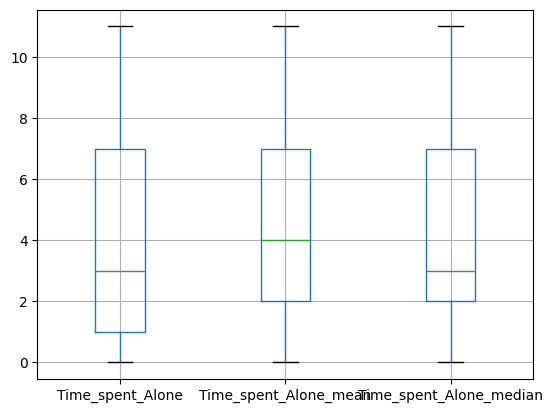

In [29]:
x_train[['Time_spent_Alone','Time_spent_Alone_mean','Time_spent_Alone_median']].boxplot()

<Axes: >

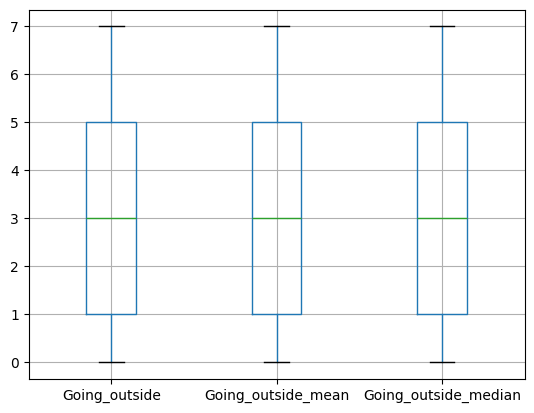

In [30]:
x_train[['Going_outside','Going_outside_mean','Going_outside_median']].boxplot()

# Using Sklearn

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [33]:
trf=ColumnTransformer([
    ('mean_imputer',imputer1,['Time_spent_Alone']),
    ('median_imputer',imputer2,['Going_outside'])
],remainder='passthrough')

In [34]:
trf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['Time_spent_Alone']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['Going_outside'])])

In [39]:
trf.named_transformers_['mean_imputer'].statistics_

array([4.43108763])

In [40]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [41]:
x_train

array([[2.0, 6.0, 'No', ..., 'No', 6.0, 4.0],
       [0.0, 3.0, 'No', ..., 'No', 8.0, 6.0],
       [0.0, 3.0, 'No', ..., 'No', 14.0, 7.0],
       ...,
       [10.0, 2.0, 'Yes', ..., 'Yes', 3.0, 0.0],
       [4.431087626596213, 1.0, 'Yes', ..., 'Yes', 4.0, 2.0],
       [0.0, 4.0, 'No', ..., 'No', 11.0, 6.0]], dtype=object)

# Arbitarary Value Imputataion

In [44]:
x_train['Time_spent_Alone_4']=x_train['Time_spent_Alone'].fillna(4)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [54]:
# Assuming you have the original column names from your x_train DataFrame before transformation
# You might need to adjust the column names if they were modified by the ColumnTransformer
original_column_names = x.columns # Replace x with your original DataFrame before splitting if needed

# Convert the NumPy array back to a DataFrame
x_train_df = pd.DataFrame(x_train, columns=original_column_names)

# Perform arbitrary value imputation using the column name
x_train_df['Time_spent_Alone_4'] = x_train_df['Time_spent_Alone'].fillna(7)

# If you need to convert it back to a NumPy array for subsequent steps:
x_train_imputed_array = x_train_df.values

# Display the head of the DataFrame with the new column
display(x_train_df.head())

<ipython-input-54-bfeb7abed29e>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train_df['Time_spent_Alone_4'] = x_train_df['Time_spent_Alone'].fillna(7)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_spent_Alone_4
0,2.0,6.0,No,8.0,No,6.0,4.0,2.000000
1,0.0,3.0,No,5.0,No,8.0,6.0,0.000000
2,0.0,3.0,No,5.0,No,14.0,7.0,0.000000
3,10.0,0.0,NaN,3.0,Yes,4.0,0.0,10.000000
4,4.431088,1.0,Yes,0.0,Yes,1.0,0.0,4.431088


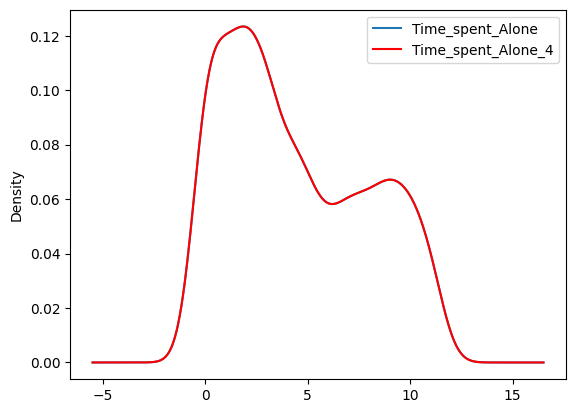

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train_df['Time_spent_Alone'].plot(kind='kde',ax=ax)
x_train_df['Time_spent_Alone_4'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Using sklearn

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
imputer1=SimpleImputer(strategy='constant',fill_value=7)


In [57]:
trf=ColumnTransformer([
    ('mean_imputer',imputer1,['Time_spent_Alone']),

],remainder='passthrough')

In [58]:
trf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 SimpleImputer(fill_value=7,
                                               strategy='constant'),
                                 ['Time_spent_Alone'])])

In [59]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [60]:
x_train

array([[2.0, 'No', 8.0, ..., 'No', 6.0, 4.0],
       [0.0, 'No', 5.0, ..., 'No', 8.0, 6.0],
       [0.0, 'No', 5.0, ..., 'No', 14.0, 7.0],
       ...,
       [10.0, 'Yes', 2.0, ..., 'Yes', 3.0, 0.0],
       [7.0, 'Yes', 3.0, ..., 'Yes', 4.0, 2.0],
       [0.0, 'No', 7.0, ..., 'No', 11.0, 6.0]], dtype=object)

# Handling Categorial Missing Data

In [36]:
df1=pd.read_csv('/content/personality_dataset.csv')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2222 non-null   object 
 2   Social_event_attendance    2671 non-null   float64
 3   Going_outside              2834 non-null   object 
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   object 
 7   Personality                2895 non-null   object 
dtypes: float64(3), object(5)
memory usage: 181.4+ KB


We can replace missing data with mode of remaining data or we can create  a different class that says missing data

In [38]:
df1.isnull().mean()

,0
Time_spent_Alone,0.021724
Stage_fear,0.233793
Social_event_attendance,0.078966
Going_outside,0.022759
Drained_after_socializing,0.017931
Friends_circle_size,0.026552
Post_frequency,0.022414
Personality,0.001724


In [22]:
df1['Stage_fear'].mode()

,Stage_fear
0,No


In [31]:
df1['Personality'] = pd.to_numeric(df1['Personality'], errors='coerce')


<ipython-input-40-3f356dbd19bd>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Stage_fear'].fillna(mode_value, inplace=True)


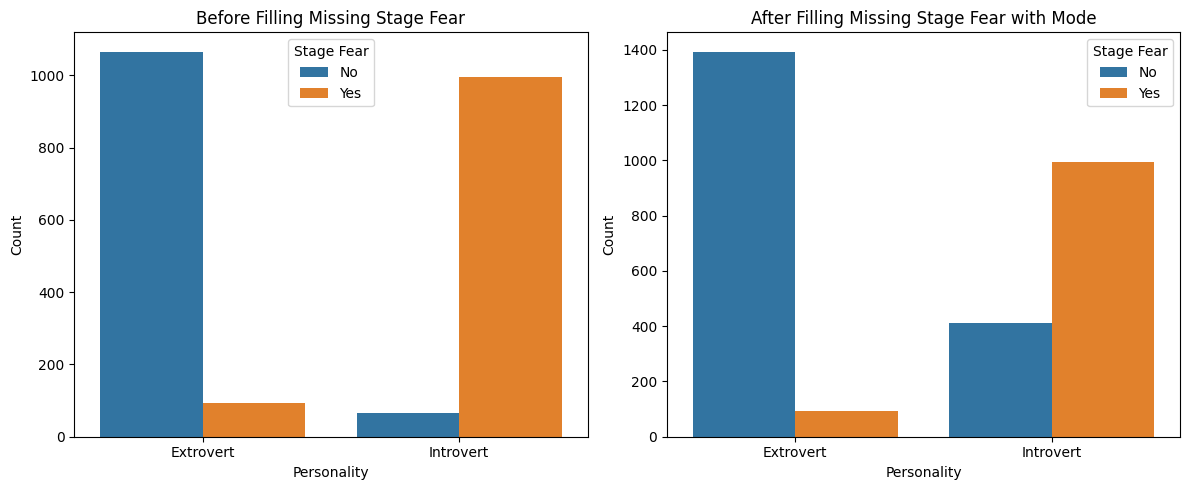

In [40]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Plot before filling missing values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Personality', hue='Stage_fear', data=df1)
plt.title("Before Filling Missing Stage Fear")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.legend(title="Stage Fear")

# Step 2: Fill missing values with mode
df2 = df1.copy()
mode_value = df2['Stage_fear'].mode()[0]
df2['Stage_fear'].fillna(mode_value, inplace=True)

plt.subplot(1, 2, 2)
sns.countplot(x='Personality', hue='Stage_fear', data=df2)
plt.title("After Filling Missing Stage Fear with Mode")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.legend(title="Stage Fear")

plt.tight_layout()
plt.show()
